In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import os



2
ONI
0
tmp


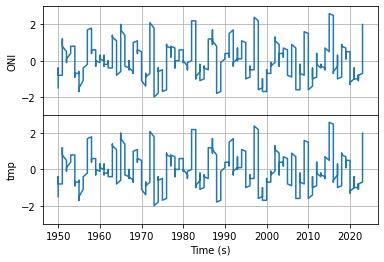

In [10]:
path = "datasets/csv/*_data.csv"

max_plots = len(glob.glob(path))

print(max_plots)

fig, axs = plt.subplots(max_plots, 1) # , layout='constrained')

for i_f, fname in enumerate(glob.glob(path)):
    
    print(os.path.basename(fname).replace("_data.csv", ""))
    
    df = pd.read_csv(fname)
    
    all_rows = []
    all_years = []
    for row in df.iterrows():

        all_rows.extend(row[1].values[1:])
        all_years.extend([int(row[1].values[0])]*12)

    axs[i_f].plot(all_years,all_rows)
    axs[i_f].set_ylim(-3, 3)
    
    axs[i_f].set_ylabel(os.path.basename(fname).replace("_data.csv", ""))
    axs[i_f].grid(True)
    
    if i_f < max_plots-1:
        print(i_f)
        axs[i_f].set_xticklabels([])
#        axs[i_f].axis('off')
    else:
        axs[i_f].set_xlabel('Time (s)')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

1
doy_cherry_Japan_Wakkanai.csv


TypeError: 'AxesSubplot' object is not subscriptable

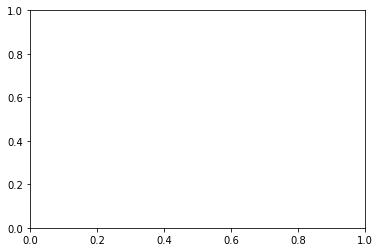

In [2]:
path = "datasets/csv/doy_*.csv"

max_plots = len(glob.glob(path))

print(max_plots)

fig, axs = plt.subplots(max_plots, 1) # , layout='constrained')

for i_f, fname in enumerate(glob.glob(path)):
    
    print(os.path.basename(fname).replace("_data.csv", ""))
    
    df = pd.read_csv(fname)
    
    all_rows = []
    all_years = []
    for row in df.iterrows():

        all_rows.extend(row[1].values[1:])
        all_years.extend([int(row[1].values[0])]*12)

    axs[i_f].plot(all_years,all_rows)
    axs[i_f].set_ylim(-3, 3)
    
    axs[i_f].set_ylabel(os.path.basename(fname).replace("_data.csv", ""))
    axs[i_f].grid(True)
    
    if i_f < max_plots-1:
        print(i_f)
        axs[i_f].set_xticklabels([])
#        axs[i_f].axis('off')
    else:
        axs[i_f].set_xlabel('Time (s)')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

74
1953


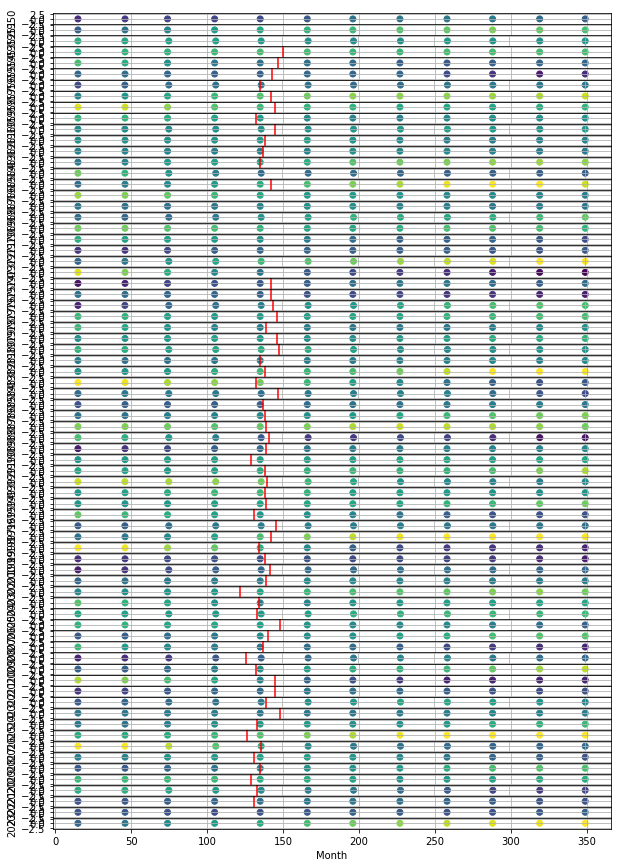

In [43]:
import datetime

path = "datasets/csv/ONI_data.csv"
df = pd.read_csv(path)

max_plots = len(df.index)
print(max_plots)

fig, axs = plt.subplots(max_plots, 1, figsize=(10, 15)) # , layout='constrained')

all_rows = []
all_years = []
for i_r, row in df.iterrows():

#    all_rows.extend(row[1].values[1:])
#    all_years.extend([int(row[1].values[0])]*12)


    # Starting year
    year = int(row[0])
    # Day of the month (middle of each month)
    day = 15

    # Generate the list of dates (day of the year)
    data_points = [(datetime.date(year, month, day) - datetime.date(year, 1, 1)).days + 1 for month in range(1, 13)]
    #print(data_points)


    #print(row.values[1:])
    #axs[i_r].plot(data_points, row.values[1:])
    axs[i_r].scatter(data_points, [0]*len(data_points), c=row.values[1:], vmin=-2, vmax=2)
    axs[i_r].set_ylim(-3, 3)

    axs[i_r].set_ylabel(int(row[0]))
    axs[i_r].grid(True)

    if i_r < max_plots-1:
        #print(i_r)
        axs[i_r].set_xticklabels([])
    #        axs[i_r].axis('off')
        
    else:
        axs[i_r].set_xlabel('Month')
        break


doy_paths = "datasets/csv/doy_*.csv"
for i_f, fname in enumerate(glob.glob(doy_paths)):
    df = pd.read_csv(fname)
    
    first_year = df["year"][0]
    print(first_year)
    for i_r, row in df.iterrows():
        #print(row)
        #print(row["cherry_bloom_doy"])
        
        # needs to match the year
        #axs[(row["year"]-1950)].scatter(row["cherry_bloom_doy"], 0, color="r")
        axs[(row["year"]-1950)].axvline(x=row["cherry_bloom_doy"], color="r")
        
        if i_r < max_plots-1:
            pass
        else:
            #axs[i_f].set_xlabel('Time (s)')
            break
  
        

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()